#### [학습에 필요한 모듈 선언]

In [1]:
import tensorflow as tf
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
%matplotlib inline
from matplotlib import pyplot as plt

#### [환경설정]

In [2]:
# 학습 데이터 수 선언
# y = 0 인 클래스
Y_0 = 20
# y = 1 인 클래스
Y_1 = 15
# 모델 최적화를 위한 학습률 선언
learningRate = 0.01
# 총 학습 횟수
totalStep = 20001

#### [빌드단계] Step 1) 학습 데이터 준비

In [3]:
# 항상 같은 난수를 생성하기 위하여 시드설정
np.random.seed(321)

# 확률(y)이 1 인 학습 데이터 생성
# 데이터 수
dataNumber_y0 = Y_0
# 데이터 평균 값
mu_y0 = [10,11]
# 데이터 분산된 정도
variance_y0 = 20
# 난수 생성
data_y0 = multivariate_normal(mu_y0, np.eye(2) * variance_y0, dataNumber_y0)
df_y0 = DataFrame(data_y0, columns=['x1','x2'])
df_y0['y'] = 0


# 확률(y)이 1 인 학습 데이터 생성
# 데이터 수
dataNumber_y1 = Y_1
# 데이터 평균 값
mu_y1 = [18,20]
# 데이터 분산된 정도
variance_y1 = 22
# 난수 생성
data1 = multivariate_normal(mu_y1, np.eye(2)*variance_y1, dataNumber_y1)
df_y1 = DataFrame(data1, columns=['x1','x2'])
df_y1['y'] = 1

# 확률(y)이 0, 1로 생성한 데이터를 하나의 DataFrame으로 합치기
df = pd.concat([df_y0, df_y1], ignore_index = True)
# 순서에 상관없이 데이터 정렬
df_totalTrainData = df.reindex(permutation(df.index)).reset_index(drop=True)


# 데이터 확인
print("===== Data =====>")
print(df_totalTrainData)
# 학습 데이터 shape 확인
print("df_totalTrainData Shape : {}\n".format(df_totalTrainData.shape))


# 학습 데이터 리스트로 변환
xTrainData = df_totalTrainData[['x1', 'x2']].as_matrix()
yTrainData_temp = df_totalTrainData['y'].as_matrix()
print("xTrainData shape : {}".format(xTrainData.shape))
print("yTrainData shape : {}".format(yTrainData_temp.shape))
# yTrainData를 (35,1)의 shape로 변경
yTrainData = yTrainData_temp.reshape([len(df_totalTrainData), 1])
print("yTrainData reshape : {}".format(yTrainData.shape))

===== Data =====>
           x1         x2  y
0   20.392049  18.307757  1
1   10.308168  17.494702  0
2    3.968656   7.334051  0
3   11.628671  15.612881  0
4   22.992714  12.788904  1
5   19.954221  22.440430  1
6    9.257684  13.886268  0
7   10.166973   7.045962  0
8   13.645120  10.916999  0
9   11.938137  12.676320  0
10   4.887489   8.221167  0
11   7.260346  26.070007  1
12   5.115159   4.908147  0
13  18.641815  28.669500  1
14  13.909982  21.514035  1
15  18.459141  12.653257  1
16   9.452312   8.982788  0
17  10.771531  18.314100  0
18  18.935671  18.916826  1
19   0.859908   7.701182  0
20  22.533939  21.979122  1
21  16.074504   9.649865  0
22   2.669742   9.601744  0
23   6.103578   8.957654  0
24   5.392252   9.474101  0
25   9.399598  18.153629  0
26  26.422975  19.157829  1
27  16.301497  20.998453  1
28   6.023998  12.843747  0
29  19.247344  13.445923  1
30   8.068010  10.380591  0
31  18.349250  26.059253  1
32  22.608064  23.453930  1
33   8.731686   8.735579  0
34

#### [빌드단계] Step 2) 모델 생성을 위한 변수 초기화

In [4]:
# 학습 데이터(x1,x2)가 들어갈 플레이스 홀더 선언
X = tf.placeholder(tf.float32, shape = [None,2])
# 학습 데이터(y)가 들어갈 플레이스 홀더 선언
Y = tf.placeholder(tf.float32, shape = [None,1])

# Weight 변수 선언
W = tf.Variable(tf.zeros([2,1]), name = 'weight')
# Bias 변수 선언
b = tf.Variable(tf.zeros([1]), name = 'bias')

#### [빌드단계] 3) 학습 모델 그래프 구성

In [5]:
# 3-1) 학습 데이터를 대표 하는 가설 그래프 선언
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# 3-2) 비용함수(오차함수,손실함수) 선언
costFunction = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

# 3-3) 비용함수의 값이 최소가 되도록 하는 최적화함수 선언
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
train = optimizer.minimize(costFunction)

#### [실행단계] 학습 모델 그래프를 실행

--------------------------------------------------------------------------------
Train(Optimization) Start
step : 0. cost : 0.6931471824645996, accuracy : 0.0
step : 2000. cost : 0.3803124725818634, accuracy : 0.9142857193946838
step : 4000. cost : 0.28600645065307617, accuracy : 0.9428571462631226
step : 6000. cost : 0.23830272257328033, accuracy : 0.9714285731315613
step : 8000. cost : 0.20899467170238495, accuracy : 0.9714285731315613
step : 10000. cost : 0.1888035386800766, accuracy : 0.9714285731315613
step : 12000. cost : 0.17383189499378204, accuracy : 0.9714285731315613
step : 14000. cost : 0.16215457022190094, accuracy : 1.0
step : 16000. cost : 0.15270663797855377, accuracy : 1.0
step : 18000. cost : 0.14484789967536926, accuracy : 1.0
step : 20000. cost : 0.13816888630390167, accuracy : 1.0
Train Finished
--------------------------------------------------------------------------------
[Train Result]
W1 value : 0.3284957706928253, W2 value : 0.2278052419424057, b Value : -8.2

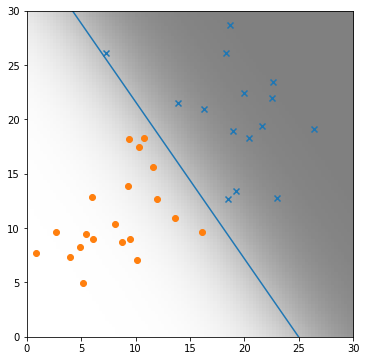

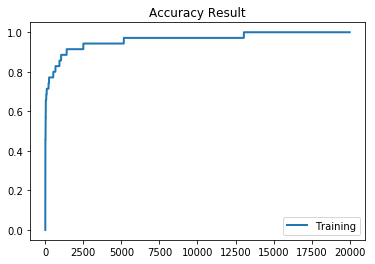

In [6]:
# 실행을 위한 세션 선언
sess = tf.Session()
# 최적화 과정을 통하여 구해질 변수 W,b 초기화
sess.run(tf.global_variables_initializer())


# 예측값, 정확도 수식 선언
predicted = tf.equal(tf.sign(hypothesis-0.5), tf.sign(Y-0.5))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

# 학습 정확도를 저장할 리스트 선언
train_accuracy = list()

print("--------------------------------------------------------------------------------")
print("Train(Optimization) Start")
for step in range(totalStep):
    # X, Y에 학습데이터 입력하여 비용함수, W, b, accuracy, train을 실행
    cost_val, acc_val, _ = sess.run([costFunction, accuracy, train],
                                    feed_dict = {X: xTrainData, Y: yTrainData})
    train_accuracy.append(acc_val)

    if step % 2000 == 0:
        print("step : {}. cost : {}, accuracy : {}".format(step, cost_val, acc_val))

print("Train Finished")
print("--------------------------------------------------------------------------------")
print("[Train Result]")
# 최적화가 끝난 W, b 변수의 값
W_val, b_val = sess.run([W,b])
W1Value, W2Value, b_Value, = W_val[0][0], W_val[1][0], b_val[0]
print("W1 value : {}, W2 value : {}, b Value : {}".format(W1Value, W2Value, b_Value))
h_val, p_val, a_val = sess.run([hypothesis, predicted, accuracy],
                               feed_dict={X: xTrainData, Y: yTrainData})
print("\nHypothesis : {} \nPrediction : {} \nAccuracy : {}".format(h_val,p_val,a_val))
print("--------------------------------------------------------------------------------")



# matplotlib 를 이용하여 결과를 시각화
trainData_y0 = df_totalTrainData[df_totalTrainData['y']==0]
trainData_y1 = df_totalTrainData[df_totalTrainData['y']==1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(trainData_y1.x1, trainData_y1.x2, marker='x')
subplot.scatter(trainData_y0.x1, trainData_y0.x2, marker='o')

linex = np.linspace(0,30,10)
liney = - (W1Value*linex/W2Value + b_Value/W2Value)
subplot.plot(linex, liney)

field = [
            [
                (1 / (1 + np.exp(-(b_Value + W1Value*x1 + W2Value*x2)))) for x1 in np.linspace(0,30,100)
            ]
                for x2 in np.linspace(0,30,100)
        ]

subplot.imshow(field, origin='lower', extent=(0,30,0,30), cmap=plt.cm.gray_r, alpha=0.5)
plt.show()

# 정확도 결과 확인 그래프
plt.plot(range(len(train_accuracy)), train_accuracy, linewidth = 2, label = 'Training')
plt.legend()
plt.title("Accuracy Result")
plt.show()

#세션종료
sess.close()